In [59]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import random
import seaborn as sns

In [60]:
df = pd.read_csv('creditcard.csv', low_memory=False)
# for shuffling Dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,79229.0,1.246458,-0.383811,0.900681,-0.720237,-1.253807,-0.836986,-0.605590,-0.005623,1.895090,...,-0.017912,0.174505,-0.029770,0.396192,0.483659,-0.684971,0.090466,0.034254,1.00,0
1,54273.0,0.877047,-0.669096,0.050735,0.996914,0.167314,1.595264,-0.315904,0.363575,0.676897,...,0.027119,0.017011,-0.461881,-1.657254,0.749002,-0.176323,0.038358,0.026286,177.82,0
2,145864.0,-1.159751,-0.582500,1.579323,-1.063597,-0.919729,0.204660,1.041929,0.255827,0.333549,...,0.341796,0.356974,0.641757,-0.054203,-0.522506,-0.090323,0.012461,0.178995,297.56,0
3,85785.0,1.069685,-0.085176,0.311721,1.450785,-0.365173,-0.208012,0.003057,0.080699,0.574089,...,-0.094368,-0.238258,-0.081798,0.045113,0.580853,-0.311588,0.018241,0.020387,56.89,0
4,105662.0,0.276979,0.281562,1.286344,0.012400,-0.366833,0.406912,-0.506439,-0.849436,2.068610,...,0.675625,-0.192347,-0.164580,-0.691090,0.532722,-0.270628,0.218340,0.263239,63.50,0


In [61]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


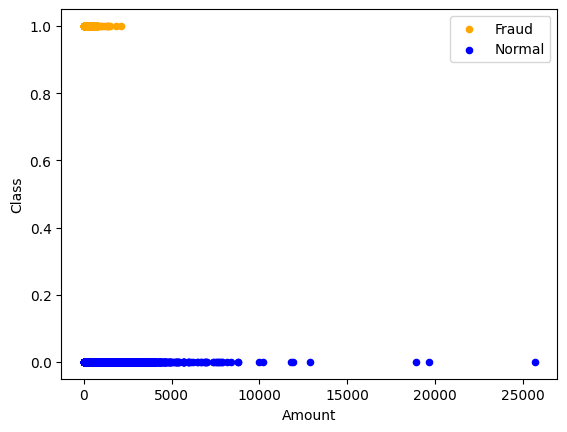

In [62]:
# Scatter plot of both classes
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [63]:
df.shape

(284807, 31)

In [64]:
df.ndim

2

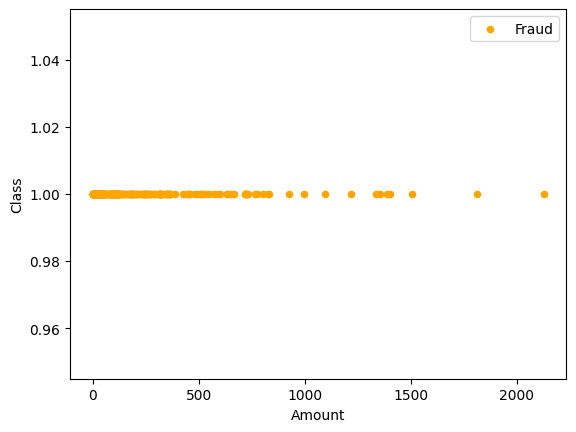

In [65]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

In [66]:
def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))




X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 176 0.0017655969423071136
Number of frauds on y_train: 316 0.001706963980899289


<h4>Logistic Regression Model:</H4>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# Scaling
scaler_logreg = StandardScaler()
X_train_scaled = scaler_logreg.fit_transform(X_train)
X_test_scaled = scaler_logreg.transform(X_test)

# Model
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train_scaled, y_train)
y_pred = LogReg.predict(X_test_scaled)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save
joblib.dump(LogReg, "logreg_model.pkl")
joblib.dump(scaler_logreg, "scaler_logreg.pkl")


Confusion Matrix:
 [[99488    19]
 [   71   105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.85      0.60      0.70       176

    accuracy                           1.00     99683
   macro avg       0.92      0.80      0.85     99683
weighted avg       1.00      1.00      1.00     99683



['scaler_logreg.pkl']

AUC-ROC Score: 0.7981999838750495


C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


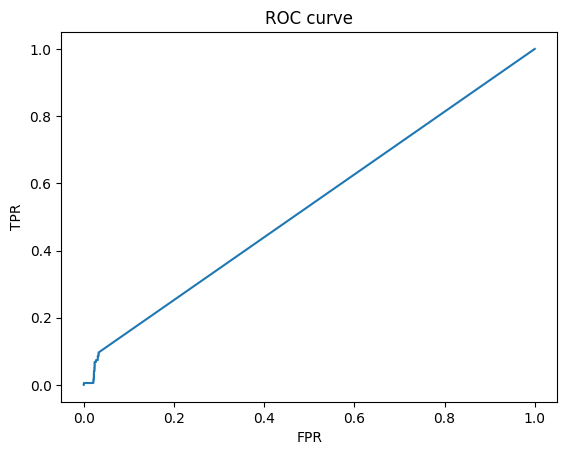

In [69]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<h4>Logistic Regression with SMOTE over-sampling</h4>

In [70]:
from imblearn.over_sampling import SMOTE 

In [71]:
print(X_train.shape)
print(y_train.shape)

(185124, 30)
(185124,)


In [72]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [73]:
print(X_res.shape)
print(y_res.shape)


unique, counts = np.unique(y_res, return_counts=True)
print(np.asarray((unique, counts)).T)


(369616, 30)
(369616,)
[[     0 184808]
 [     1 184808]]


C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


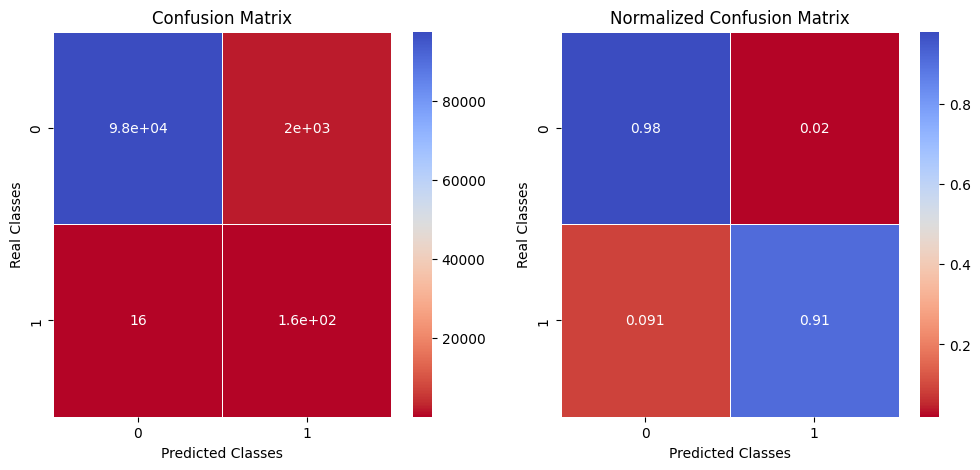

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     99507
           1       0.07      0.91      0.14       176

    accuracy                           0.98     99683
   macro avg       0.54      0.94      0.56     99683
weighted avg       1.00      0.98      0.99     99683

Score:  0.9800367163909594


In [74]:
LogReg = LogisticRegression()
LogReg.fit(X_res, y_res)
y_pred = LogReg.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

print("Score: ", LogReg.score(X_test, y_test))

AUC-ROC Score: 0.9446265543675776


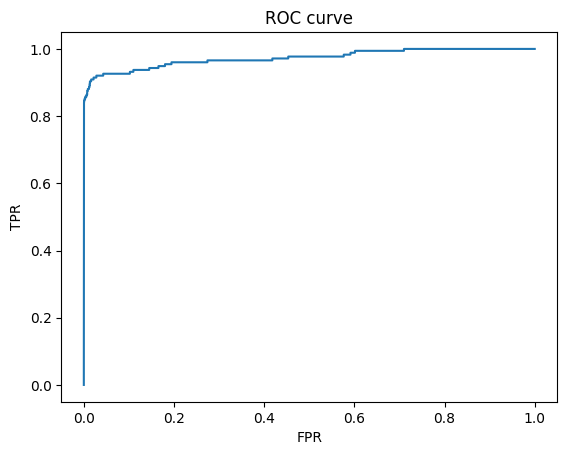

In [75]:
from sklearn.metrics import roc_curve,roc_auc_score
print("AUC-ROC Score:",roc_auc_score(y_test, y_pred))


predictions = LogReg.predict_proba(X_test)
y_pred = LogReg.predict(X_test) 
fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<h4>Decision Tree: </h4>

Confusion Matrix:
 [[99465    42]
 [   45   131]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.76      0.74      0.75       176

    accuracy                           1.00     99683
   macro avg       0.88      0.87      0.88     99683
weighted avg       1.00      1.00      1.00     99683

AUC-ROC Score: 0.8719480504797743


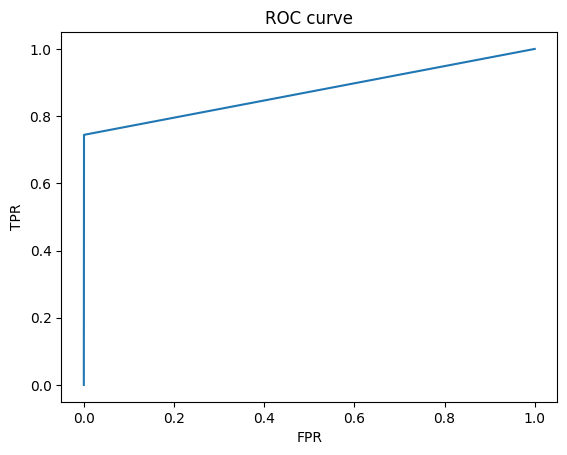

['decision_tree_model.pkl']

In [76]:
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import joblib

# Optionally scale if needed — not always required for DecisionTree
# from sklearn.preprocessing import StandardScaler
# scaler_dt = StandardScaler()
# X_train_scaled = scaler_dt.fit_transform(X_train)
# X_test_scaled = scaler_dt.transform(X_test)

# Decision Tree model
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
predictions = dt_model.predict_proba(X_test)
y_pred = dt_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# AUC-ROC
print("AUC-ROC Score:", roc_auc_score(y_test, predictions[:, 1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Save the model
joblib.dump(dt_model, "decision_tree_model.pkl")

# If using scaler:
# joblib.dump(scaler_dt, "scaler_dt.pkl")


<h4>Random Forest:</h4>

ROC AUC Score: 0.9587170146549763


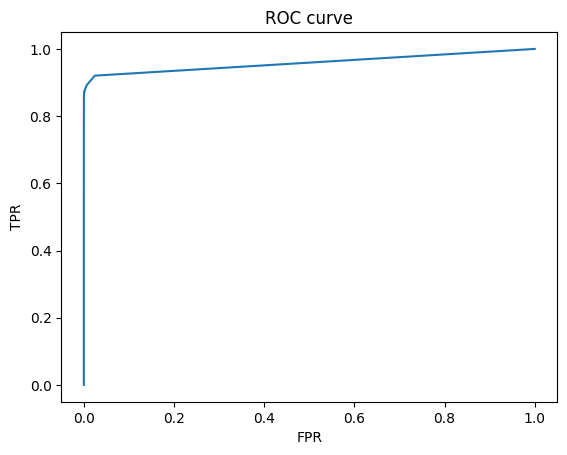

Confusion Matrix:
 [[99498     9]
 [   40   136]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.94      0.77      0.85       176

    accuracy                           1.00     99683
   macro avg       0.97      0.89      0.92     99683
weighted avg       1.00      1.00      1.00     99683



['random_forest_model.pkl']

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

# Train RandomForestClassifier (not Regressor)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_probs = rf_model.predict_proba(X_test)[:, 1]  # for ROC
y_pred = rf_model.predict(X_test)  # for actual prediction

# Evaluation
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(rf_model, "random_forest_model.pkl")


### DBSCAN

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
import numpy as np

# Feature selection
X = df.drop(['Class'], axis=1)
y = df['Class']

# Standardize features
scaler_dbscan = StandardScaler()
X_scaled = scaler_dbscan.fit_transform(X)

# DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Assign predicted labels (-1 as anomaly/fraud, 1 as legit)
predicted = np.where(dbscan_labels == -1, 1, 0)

# Evaluation
print("DBSCAN Classification Report (Label -1 as Fraud):")
print(classification_report(y, predicted))

# Save model and scaler
joblib.dump(dbscan, "dbscan_model.pkl")
joblib.dump(scaler_dbscan, "scaler_dbscan.pkl")


DBSCAN Classification Report (Label -1 as Fraud):
              precision    recall  f1-score   support

           0       1.00      0.66      0.79    284315
           1       0.00      0.95      0.01       492

    accuracy                           0.66    284807
   macro avg       0.50      0.80      0.40    284807
weighted avg       1.00      0.66      0.79    284807



['scaler_dbscan.pkl']

In [83]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [84]:

# Build and train a simple deep learning model
model_dl = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dl.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2)


Epoch 1/10


C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4180 - loss: 4559.7378 - val_accuracy: 0.9982 - val_loss: 8.9814
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9984 - loss: 8.0751 - val_accuracy: 0.9982 - val_loss: 8.7641
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9984 - loss: 7.8258 - val_accuracy: 0.9982 - val_loss: 8.4348
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9983 - loss: 8.2443 - val_accuracy: 0.9982 - val_loss: 8.0267
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9983 - loss: 7.4642 - val_accuracy: 0.9982 - val_loss: 7.5731
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9983 - loss: 7.2085 - val_accuracy: 0.9982 - val_loss: 7.0611
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 6.3870 - val_accuracy: 0.9982 - val_loss: 6.5092
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9983 - loss: 6.2755 - val_accuracy: 0.9982 - val_loss: 5.8902

In [85]:

# Evaluate on test set
dl_preds = (model_dl.predict(X_test) > 0.5).astype("int32")
print("Deep Learning Model Evaluation:")
print(classification_report(y_test, dl_preds))


3116/3116 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step  
Deep Learning Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.00      0.00      0.00       176

    accuracy                           1.00     99683
   macro avg       0.50      0.50      0.50     99683
weighted avg       1.00      1.00      1.00     99683



In [86]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assume X_train is defined
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save model using newer Keras format
model_dl.save("fraud_dl_model.keras")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']